# Machine Learning Engineer Nanodegree
## Capstone Project
Antal Berenyi  
April 1, 2018

## I. Definition
_(approx. 1-2 pages)_
Copy over from proposal

### Project Overview
In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:
- _Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?_
- _Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?_

### Problem Statement
In this section, you will want to clearly define the problem that you are trying to solve, including the strategy (outline of tasks) you will use to achieve the desired solution. You should also thoroughly discuss what the intended solution will be for this problem. Questions to ask yourself when writing this section:
- _Is the problem statement clearly defined? Will the reader understand what you are expecting to solve?_
- _Have you thoroughly discussed how you will attempt to solve the problem?_
- _Is an anticipated solution clearly defined? Will the reader understand what results you are looking for?_

### Metrics
In this section, you will need to clearly define the metrics or calculations you will use to measure performance of a model or result in your project. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. Questions to ask yourself when writing this section:
- _Are the metrics you’ve chosen to measure the performance of your models clearly discussed and defined?_
- _Have you provided reasonable justification for the metrics chosen based on the problem and solution?_

## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration
In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200
%matplotlib inline
df = pd.read_csv('https://resources.lendingclub.com/LoanStats_2017Q1.csv.zip', skiprows=1, compression='zip', low_memory=False)


### Data Exploration
### Features
There is a large number of features available in the data set, here I discuss treatment of each and how and to what degree they may be relevant to the prediction. The training set will be a reduced and possibly transformed subset of these features. A brief description of these features can be read in the Data Dictionary presented below from the LC web site. I'll use that information and common sense to gauge what to do with each feature.

- member_id - this will be removed because the data set is anonymized anyways.
- loan_amnt - this is an important feature, we'll need to keep it. Convert to float32
- funded_diff - Engineered feature 
- funded_amnt_inv - The total amount committed by investors for that loan at that point in time. If we are looking at an older data frame then this would not be saying much. It may be worth investigating as the percentage funded as time since approval to see if the rate at which it is funded. But I will not use it initially.
- term - This is categorical with two values 36 or 60 months. This is an actual month amount so I can keep it but need to convert it to int. Records where this value is null are discarded. (only 2 records in Q12017 data)
- installment - monthly payment and it is important; use it.
- grade - A,B,C,D,R. Use subgrade because it is more fine grained.
(- sub_grade - Each grade is sub-divided into 5 sub-grades. It is more fine-grained information than grade alone. This may be the only column needed as it already has grade information. It has to be encoded. )
- emp_title - NOT USED. The title to loan ration is 1/3, rendering this column useless since most values are unique.
- emp_length - Important. Need to convert to numerical.
- home_ownership - Important. Need to one-hot-encode.
- annual_inc - Important. 
- verification_status - Indicates if income was verified by LC. Important and needs to be encoded.
- pymnt_plan - 

Zip codes: since there are so many, I will keep the first 3 digits, which were given. 

FICO scores, I will use the average 

Join borrowers columns: I have filled the missing values from the individual borrowers' loan amount. 

I have decided to not consider hardship flags since it is very rare, all values except one are N. I have removed all the settlement columns since they are indiactive what happens AFTER the charge-off. 

In [58]:
# import these columns. Data files from different quarters may have different columns.
usecols = ['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 
           'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 
           'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 
           'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 
           
           'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_credit_pull_d', 
           'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 
           'mths_since_last_major_derog', 'application_type', 'annual_inc_joint', 'dti_joint', 
           'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 
           'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
           'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 
           'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 
           'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
           'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 
           'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 
           'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 
           'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
           'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 
           'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
           'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 
           'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 
           'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 
           'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']
          
dtype   = {'loan_amnt': np.float32, 'funded_amnt': np.float32, 'installment':np.float32}

# converters
term_c = lambda x: np.int32(x.lstrip()[:2]) # keep the numerical part of term and convert to int
int_rate_c = lambda x: np.float32(x.strip('%')) # strip the percent sign from interest rate
grade_d = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F':2, 'G': 1}
grade_c = lambda x: grade_d.get(x)

conv = {'term': term_c, 'int_rate':int_rate_c, 'grade': grade_c}


df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, engine='python', dtype=dtype, 
                 usecols=usecols, converters=conv)
display(df.head(5))
df.dtypes

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,15000.0,36,5.32,451.730011,7,A1,10+ years,MORTGAGE,182000.0,Not Verified,n,debt_consolidation,751xx,9.35,0,Nov-1974,740,744,0,NaN,NaN,13,0,34623,33.7%,32,w,Feb-2018,724,720,0,NaN,Individual,NaN,NaN,NaN,0,0,233521,0,1,0,1,24.0,2667,59.0,2,2,12503,42,102600,1,6,0,4,17963,55203.0,26.0,0,0,92.0,508,8,8,5,8.0,NaN,17.0,NaN,0,3,6,7,11,9,10,16,6,13,0.0,0,0,2,100.0,0.0,0,0,325464,50766,74600,4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17000.0,36,7.49,528.729980,7,A4,10+ years,MORTGAGE,120000.0,Not Verified,n,debt_consolidation,840xx,8.41,0,Oct-2005,735,739,0,72.0,89.0,9,1,15406,31.6%,34,w,Feb-2018,754,750,0,75.0,Individual,NaN,NaN,NaN,0,0,290743,0,2,1,1,9.0,33276,86.0,0,2,5681,56,48800,1,0,1,3,32305,32394.0,32.2,0,0,137.0,119,24,9,2,24.0,NaN,9.0,NaN,0,4,4,5,6,24,6,8,4,9,0.0,0,0,1,94.1,20.0,1,0,374071,48682,47800,38667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,36,5.32,602.299988,7,A1,3 years,RENT,120000.0,Not Verified,n,credit_card,926xx,26.54,0,Aug-2002,770,774,1,NaN,NaN,18,0,2646,3%,60,w,Feb-2018,814,810,0,NaN,Individual,NaN,NaN,NaN,0,0,675385,1,10,1,2,3.0,672739,106.0,1,3,2075,51,87400,0,0,2,5,37521,84754.0,3.0,0,0,175.0,175,9,3,0,9.0,NaN,3.0,NaN,0,3,3,8,12,46,8,14,3,18,0.0,0,0,2,100.0,0.0,0,0,688272,675385,87400,600872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16000.0,60,12.74,361.929993,5,C1,10+ years,MORTGAGE,130000.0,Not Verified,n,debt_consolidation,577xx,8.28,0,Jul-1995,680,684,0,42.0,79.0,16,1,8595,25.8%,48,w,Feb-2018,754,750,0,NaN,Individual,NaN,NaN,NaN,0,0,44263,0,3,1,2,8.0,35668,77.0,2,6,4566,56,33300,3,9,6,8,2766,3350.0,58.1,0,0,141.0,260,10,8,3,23.0,NaN,8.0,42.0,0,2,5,2,12,12,13,33,5,16,0.0,0,0,3,97.6,50.0,1,0,79751,44263,8000,46451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000.0,36,16.99,71.300003,4,D1,6 years,MORTGAGE,62000.0,Not Verified,n,credit_card,983xx,16.43,0,Oct-2007,680,684,2,57.0,44.0,10,2,6504,44.9%,20,f,Feb-2018,659,655,0,57.0,Individual,NaN,NaN,NaN,0,0,321694,4,2,1,3,2.0,33320,87.0,5,7,3381,75,14500,3,4,4,11,32169,5591.0,51.4,0,0,113.0,113,6,2,2,6.0,NaN,0.0,NaN,1,3,5,5,7,8,7,10,5,10,0.0,0,0,7,100.0,40.0,2,0,337688,39824,11500,38491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


loan_amnt                              float32
term                                     int64
int_rate                               float64
installment                            float32
grade                                    int64
sub_grade                               object
emp_length                              object
home_ownership                          object
annual_inc                             float64
verification_status                     object
pymnt_plan                              object
purpose                                 object
zip_code                                object
dti                                    float64
delinq_2yrs                              int64
earliest_cr_line                        object
fico_range_low                           int64
fico_range_high                          int64
inq_last_6mths                           int64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open_acc     

In [8]:
#df = pd.read_csv('data/LoanStats_securev1_2017Q1.csv', skiprows=1, skipfooter=2, engine='python')#, usecols=usecols, converters=conv)
#display(df.head(200))
#display(df.tail(5))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,104280113,NaN,15000,15000,15000,36 months,5.32%,451.73,A,A1,Executive Account Manager,10+ years,MORTGAGE,182000.0,Not Verified,Mar-2017,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,751xx,TX,9.35,0,Nov-1974,740,744,0,NaN,NaN,13,0,34623,33.7%,32,w,11069.93,11069.93,4508.430000,4508.43,3930.07,578.36,0.0,0.0,0.0,Feb-2018,451.73,Mar-2018,Feb-2018,724,720,0,NaN,1,Individual,NaN,NaN,NaN,0,0,233521,0,1,0,1,24.0,2667,59.0,2,2,12503,42.0,102600,1,6,0,4,17963,55203.0,26.0,0,0,92.0,508,8,8,5,8.0,NaN,17.0,NaN,0,3,6,7,11,9,10,16,6,13,0.0,0,0,2,100.0,0.0,0,0,325464,50766,74600,4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,104170260,NaN,17000,17000,17000,36 months,7.49%,528.73,A,A4,Air Traffic Controller,10+ years,MORTGAGE,120000.0,Not Verified,Mar-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,840xx,UT,8.41,0,Oct-2005,735,739,0,72.0,89.0,9,1,15406,31.6%,34,w,0.00,0.00,17282.802792,17282.80,17000.00,282.80,0.0,0.0,0.0,Jun-2017,16768.22,NaN,Feb-2018,754,750,0,75.0,1,Individual,NaN,NaN,NaN,0,0,290743,0,2,1,1,9.0,33276,86.0,0,2,5681,56.0,48800,1,0,1,3,32305,32394.0,32.2,0,0,137.0,119,24,9,2,24.0,NaN,9.0,NaN,0,4,4,5,6,24,6,8,4,9,0.0,0,0,1,94.1,20.0,1,0,374071,48682,47800,38667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,104050245,NaN,20000,20000,20000,3

In [ ]:
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
    dd = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
    display(dd)

### Exploratory Visualization
In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

#### Plot of the Distribution of Loan Amount and installment
This plot shows how much each month the borrower needs to replay. The mean is between 200 and 300.

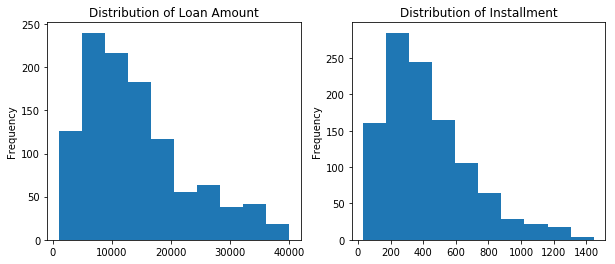

In [20]:
plt.subplots(21, figsize=(10,4))
plt.subplot(121)
df.loan_amnt.plot.hist(title='Distribution of Loan Amount');
plt.subplot(122)
df.installment.plot.hist(title='Distribution of Installment');

#### Histogram of loan terms.
There are only 36 and 60 month terms.

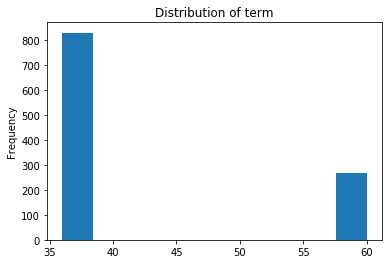

In [17]:
df.term.plot.hist(title='Distribution of term');

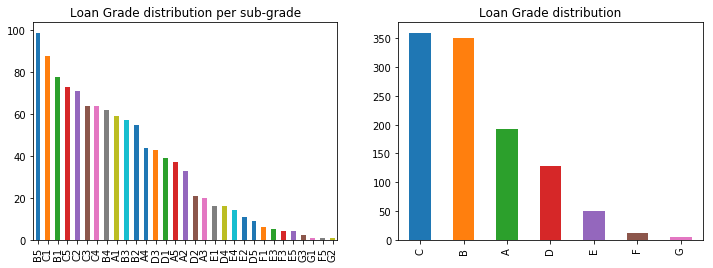

In [23]:
plt.subplots(figsize=(12,4))
plt.subplot('121')
df.sub_grade.value_counts().plot.bar(title='Loan Grade distribution per sub-grade');
plt.subplot('122')
df.grade.value_counts().plot.bar(title='Loan Grade distribution');


In [9]:
print("Title to loan ratio:", len(df.emp_title.value_counts()) / len(df));

Title to loan ratio: 0.3668151148492958


#### Distribution of employment lengths
About one third of the loans were given to individuals with 10+ years of employment. The other 2/3 are given in a much lower proportion to shorter term. 10+ is a collective buckes as includes employment lenghts of 11, 12, 15, 20 up to retirement.

In [69]:
# Encode emp_length: number to number and NaN to 0
df.emp_length.unique()
#df.emp_length.fillna('0', inplace=True)

#import re
#[ re.search(r'\d+', s).group() for s in df.emp_length.unique()]
#emp_len_m = {'10+ years':10, '3 years': 3, '6 years': 6, np.nan: 0, '< 1 year': 0.5, '1 year': 1,
#       '4 years':4, '8 years':8, '2 years':2, '5 years':5, '9 years':9, '7 years':7}
#df.emp_length.map(emp_len_m)


array(['10+ years', '3 years', '6 years', nan, '< 1 year', '1 year',
       '4 years', '8 years', '2 years', '5 years', '9 years', '7 years'], dtype=object)

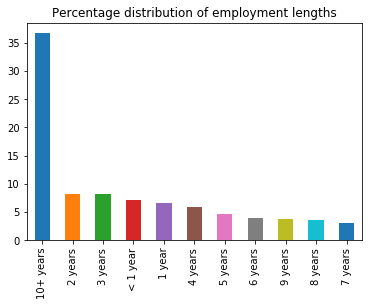

In [60]:
eld = round(df.emp_length.value_counts()/len(df)*100,1)
eld.plot.bar(title='Percentage distribution of employment lengths');

#### Percentage distribution of Home Ownership type among loan recipients
About half of the loan recipients pay mortgage, compared to renting, owning or other. It begs to ask how much money borrowers have left over after paying their mortgages? It seems reasonable to think that people with a long a reliable mortgage history may have higher rating. It will be worth investigating correlation between Home Ownership and other features. Also does NONE mean that a borrower is homeless? Other features such as car ownership would be useful to know: a person may default on other loans before a car loan.

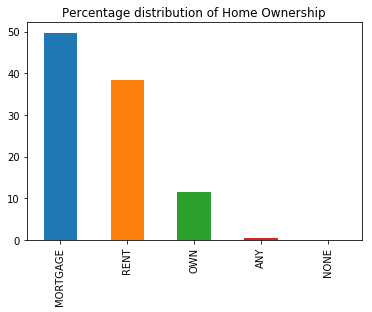

In [23]:
eld = round(df.home_ownership.value_counts()/len(df)*100,1)
eld.plot.bar(title='Percentage distribution of Home Ownership');

#### Annual Income distribution
The annual income is perhaps one of the pivotal features. It is worth taking a deeper look. The histogram below shows income distribution in the \$0-200k range. There appears to be spurious data, for illustration see the table. There is a  borrower with income \$61 million and emp_title indicated waitress. There is some data that is suspicious and unlikely. It may be worth asking LC a few questions about their verification process!

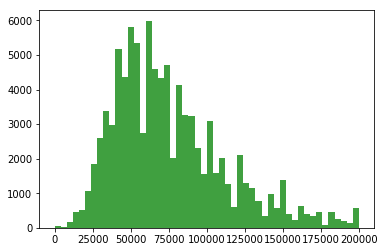

In [157]:
plt.hist((df.annual_inc), 50, range=(0, 200000), facecolor='g', alpha=0.75);

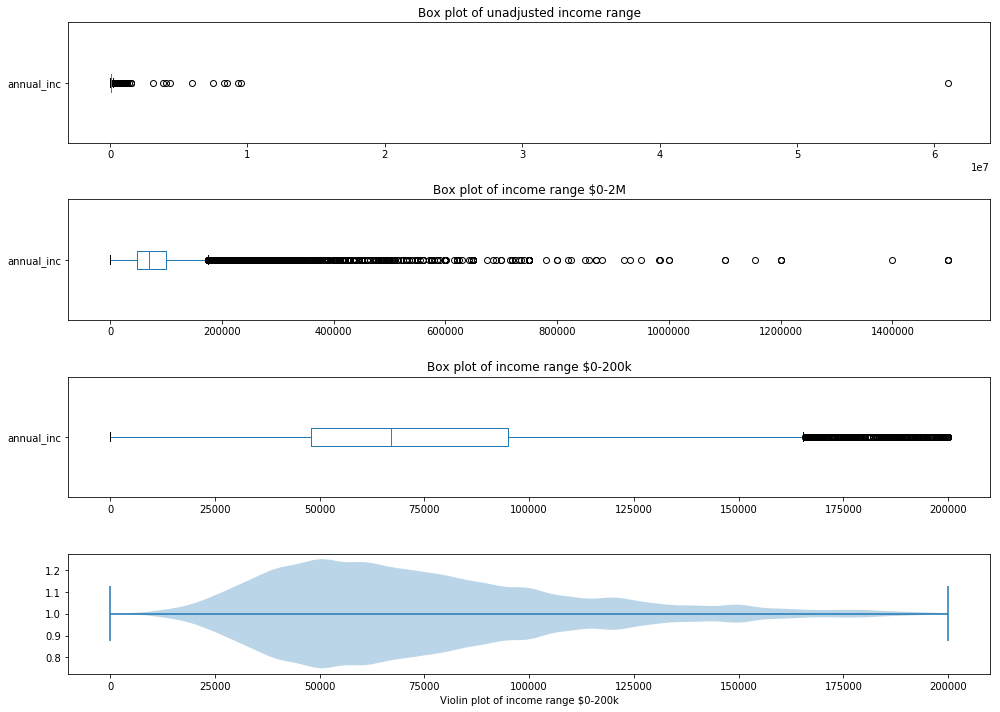

In [150]:
fig, axes = plt.subplots(4,1,figsize=(14,10))
plt.subplot(411)
plt.title='Income distribution'
df.annual_inc.plot.box(vert=False, title='Box plot of unadjusted income range');


plt.subplot(412)
df[df.annual_inc < 2e6].annual_inc.plot.box(vert=False, title='Box plot of income range $0-2M');

plt.subplot(413)
df[df.annual_inc < 2e5].annual_inc.plot.box(vert=False, title='Box plot of income range $0-200k');

plt.subplot(414)
plt.violinplot(df[df.annual_inc < 2e5].annual_inc, vert=False);
plt.xlabel('Violin plot of income range $0-200k');
plt.tight_layout()


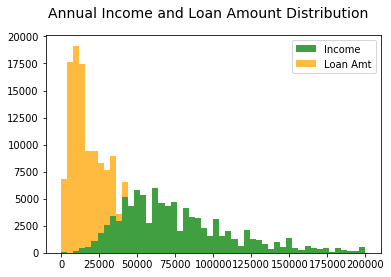

In [173]:
a,b,c = plt.hist((df.annual_inc, df.loan_amnt), 50, color=['g','orange'], 
                histtype='barstacked', stacked=True, range=(0, 200000), alpha=0.75)
plt.suptitle('Annual Income and Loan Amount Distribution', fontsize=14);
plt.legend(['Income', 'Loan Amt']);

The table below shows emp_title and annual income for borrowers with annual income > \$200k who defaulted. High income is not a guarantee for loan repayment.

In [182]:
df[(df.loan_status == 'Charged Off') & (df.annual_inc > 2e5)][['annual_inc', 'grade', 'emp_title', 'verification_status']].sort_values('annual_inc')

,annual_inc,grade,emp_title,verification_status
60789,205000.0,C,Licensed loan officer,Verified
62558,208000.0,E,Physician,Verified
72198,210000.0,C,owner,Source Verified
72931,210000.0,D,General Manager,Source Verified
15246,210000.0,A,President,Verified
15559,210000.0,F,Sales,Verified
89676,210000.0,C,Assistant General Counsel,Source Verified
42415,211200.0,C,Senior Accountant,Source Verified
46155,211400.0,D,Director,Source Verified
23775,212000.0,C,Financial Advisor,Source Verified


### Algorithms and Techniques
In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_

### Benchmark
In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_

## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_

### Implementation
In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_

### Refinement
In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_

## IV. Results
_(approx. 2-3 pages)_

### Model Evaluation and Validation
In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
 - Run prediction on different quarters.
 
- _Can results found from the model be trusted?_

### Justification
In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_

## V. Conclusion
_(approx. 1-2 pages)_

### Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_

Visualize profit growth with added percentage interest.
Relate default rate to interest.

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_

-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?